<a href="https://colab.research.google.com/github/Sonam1725/Machine-Learning/blob/main/BankChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

We are trying to predict if the bank customer will Churn(leave) or stay with the current bank.

# Data

We got the data from kaggle:

https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

# Features:
* CreditScore : What is their credit score?
* Geography : What Country they are from?
* Gender : Male or Female
* Age : How old?
* Tenure : How long have they been with the bank (years)?
* Balance : How much is in their bank account?
* NumOfProducts
* HasCrCard : Do they have a credit card?
* IsActiveMember : Are they still a member of the bank?
* EstimatedSalary : How much do they earn?
* Exited :
0: No, the customer has not exited.
1: Yes, the customer has exited.


# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Using pandas to import the csv file
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head(5) # looking at the top 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Getting some info about the dataset
dataset.info() # there are no null values but there seem to be three object data types which we need to change to numberical type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:

# Making a copy of the dataset
df = dataset.copy()

In [5]:
# The RowNumber, CustomerId, and Surname columns have no impact so the model so we will drop them
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:

# looking at stats to see if there is any outliers
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis (EDA)

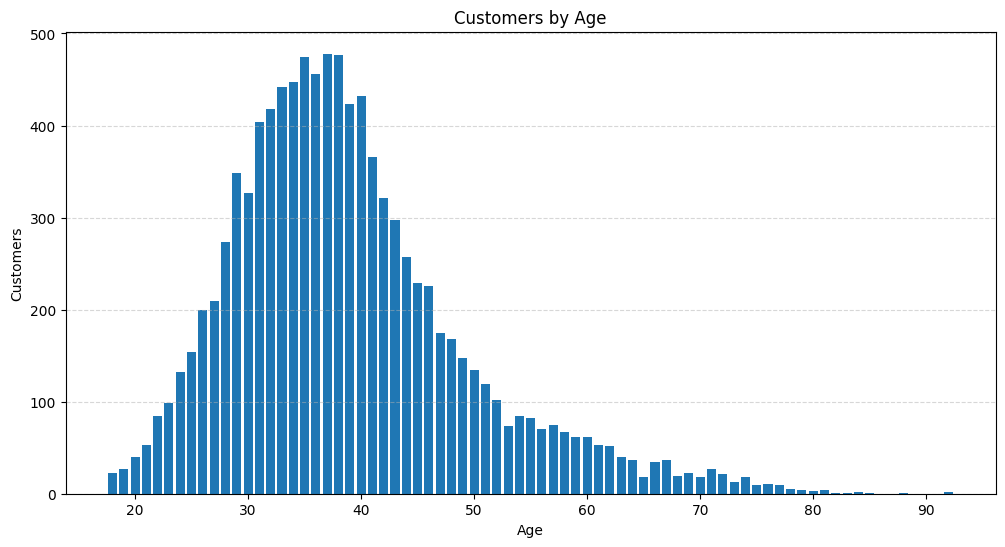

In [7]:
# Looking at the distribution of the age in this dataset

# Group the data by "Age" and see their distribution in the dataset
age_counts = df.groupby("Age")["Exited"].count().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_counts["Age"], age_counts["Exited"])
plt.xlabel("Age")
plt.ylabel("Customers")
plt.title("Customers by Age")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

Looking at this it looks like most of the customers are between the age of 32-42 years old.

In [8]:
# Comparing the Gender to find out which gender is more likely to leave
cross_tab = pd.crosstab(df["Gender"], df["Exited"])
cross_tab # It looks like Male are less likely to leave than female

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


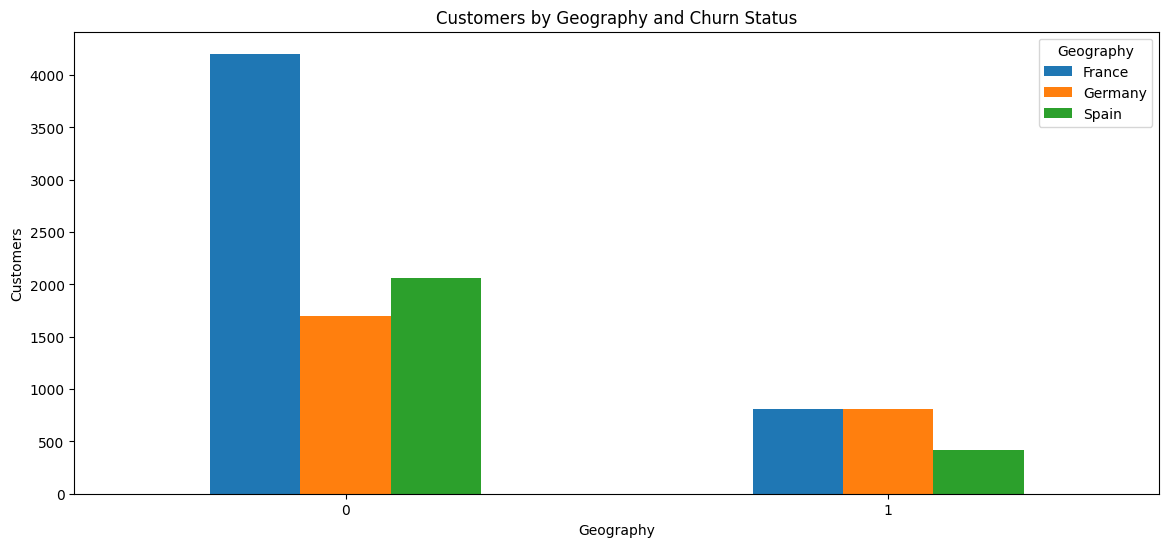

In [9]:
# Lets see if there is Geography difference in customer that churn vs those that stayed?
grouped_data = df.groupby(["Exited", "Geography"])["Exited"].count().unstack()

# Create a bar plot
grouped_data.plot(kind="bar", figsize=(14, 6))
plt.xlabel("Geography")
plt.ylabel("Customers")
plt.title("Customers by Geography and Churn Status")
plt.xticks(rotation=0)
plt.legend(title="Geography")
plt.show()


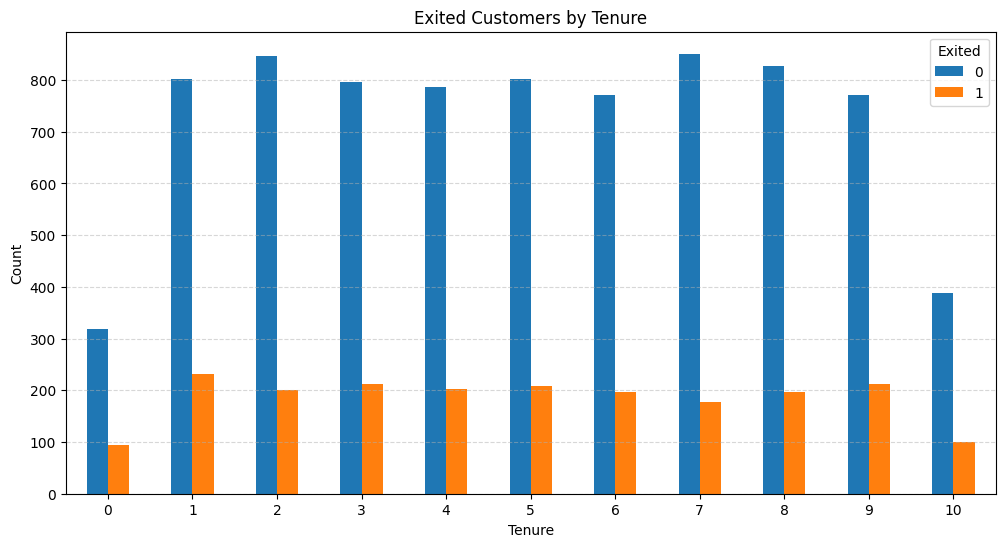

In [10]:
# Looking at customer churn trend line based on tenure
cross_tab = pd.crosstab(df["Tenure"], df["Exited"])
# Create a bar plot
cross_tab.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Exited Customers by Tenure")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0)
plt.show()


# Preprocessing

In [11]:
# Converting the Gender into numberical values using Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [12]:
# One hot encoding Geography column to convert it into numberical values using pd.getdummies() function
df = pd.get_dummies(df, columns=["Geography"], prefix=["Geography"])

# Split the data

In [13]:
# Splitting the dataset into features (x) and target (y)
x = df.drop("Exited", axis=1)
y = df["Exited"]

In [14]:
# Splitting the data into train-validation-test
from sklearn.model_selection import train_test_split

# 80% into tran set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

# 10% into validation set and 10% into test set by spliting the 20% from previous split
x_val, x_test, y_val, y_test = train_test_split(x,y, test_size=.5)

In [15]:
# Looking at the shape to make sure it each set got correct amount of data
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:",y_test.shape)

x_train: (8000, 12)
x_val: (5000, 12)
x_test: (5000, 12)
y_train: (8000,)
y_val: (5000,)
y_test: (5000,)


# Standardizing the data using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# We only need to standardize the train x sets
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

# Creating the model

In [17]:
# SGDClassifier Model
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(x_train,y_train)
y_valpred = SGD.predict(x_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [18]:
# SGDClassifier Model Metric
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_valpred)
print(cm)
accuracy_score(y_val, y_valpred)

[[3714  301]
 [ 743  242]]


0.7912

In [19]:
# RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_valpred = rfc.predict(x_val)

# RandomForestClassifier Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_valpred)
print(cm)
accuracy_score(y_val, y_valpred)

[[3987   28]
 [ 113  872]]


0.9718

In [20]:
y_valpred[:20],y_val[:20].values

(array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]))

# Using Tensorflow

In [21]:
import tensorflow as tf
tf_model = tf.keras.models.Sequential()

In [34]:
tf_model.add(tf.keras.layers.Dense(units=10, activation='relu'))
tf_model.add(tf.keras.layers.Dense(units=6, activation='relu'))
tf_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [35]:
tf_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
tf_model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5682 - accuracy: 0.7961
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7961
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7961
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.7961
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7961
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8227
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8289
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8311
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4245 - accura

In [37]:
y_pred = tf_model.predict(x_val)

157/157 [==============================] - 0s 886us/step


In [38]:
y_pred = tf_model.predict(x_test)
y_pred = (y_pred > 0.5)


157/157 [==============================] - 0s 890us/step


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[3587  428]
 [ 880  105]]


0.7384

# Conclussion

In [119]:
# Predicting on the test data
y_testpred = rfc.predict(x_test)

In [141]:
y_probabilities = rfc.predict_proba(x_test)

In [139]:
# Creating a data frame of the prediction
prediction_df = pd.DataFrame({"prediction": y_testpred,
             "Actual": y_test})
prediction_df = prediction_df.replace(0, "Stayed")
prediction_df = prediction_df.replace(1, "Left")

# New column "Match" to indicate correctness
prediction_df["Match"] = prediction_df["prediction"] == prediction_df["Actual"]

# Convert boolean values to "Correct" or "Wrong"
prediction_df["Match"] = prediction_df["Match"].map({True: "Correct", False: "Wrong"})

# Adding Percent Probabilities of Staying
prediction_df["Probabilities_of_staying_%"] = y_probabilities[:,0] *100

# Adding a % sign by converting the values into string
prediction_df["Probabilities_of_staying_%"] =prediction_df["Probabilities_of_staying_%"].astype(str) + "%"

# Adding Percent Probabilities of Leaving
prediction_df["Probabilities_of_leaving_%"] = np.around(y_probabilities[:, 1] * 100,2)

# Adding a % sign by converting the values into string
prediction_df["Probabilities_of_leaving_%"]=prediction_df["Probabilities_of_leaving_%"].astype(str) + "%"

# Print the updated DataFrame
prediction_df


,prediction,Actual,Match,Probabilities_of_staying_%,Probabilities_of_leaving_%
891,Stayed,Stayed,Correct,98.0%,2.0%
4107,Left,Left,Correct,27.0%,73.0%
3201,Stayed,Stayed,Correct,98.0%,2.0%
6573,Stayed,Stayed,Correct,97.0%,3.0%
8879,Stayed,Stayed,Correct,96.0%,4.0%
...,...,...,...,...,...
5371,Stayed,Left,Wrong,94.0%,6.0%
5624,Stayed,Stayed,Correct,64.0%,36.0%
4504,Stayed,Stayed,Correct,92.0%,8.0%
5255,Left,Left,Correct,30.0%,70.0%


In [140]:
# Checking the metrics with our test data
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_testpred, y_test)
print(cm)
accuracy_score(y_testpred, y_test)

[[3920  128]
 [  28  924]]


0.9688